# Heart Disease
## Data Interpretation and Visualisation

#### https://www.kaggle.com/ronitf/heart-disease-uci

<img src="heart.jpg">

## Business Understanding

According to the WHO, Cardiovascular diseases (CVDs) are the number 1 cause of death globally, with an estimated 17.9 million deaths each year. CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions. Four out of 5CVD deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age.
    
With the current lifestyle of fast food and high stress jobs, heart diseases have become a common ailment in the current population. Heart attacks and strokes are fatal, but they can also lead to serious illness, disability, and lower quality of life if the individual survives the attack.
    
Medical research has found that the following factors contribute greatly to the risk of :

1. High blood pressure
2. High cholesterol
3. Smoking induced respiratory problems
4. Lack of exercise
5. Increasing age 
6. Gender- It was found that males have a greater risk of heart disease

Beyond these factors, heredity and race of the individual has also been found to play a role in the occurrence of heart disease. A family history of heart disease can make an individual more susceptible to heart diseases.


If we estimate the financial impact of heart diseases, it costs the United States an estimated USD 219 billion each year. This includes the cost of health care services, medicines, and lost productivity due to death. The cost is expected to reach over a USD 1.1 trillion by 2035.

## Data Understanding





The variables of the dataset are as follows:
1. Age
2. Sex
3. Chest Pain Type (4 levels)
    - Value 0: typical angina 
    - Value 1: atypical angina \n
    - Value 2: non-anginal pain \n
    - Value 3: asymptomatic \n
4. Resting Blood Pressure
5. Serum Cholesterol in mg/dl
6. Fasting Blood Sugar > 120 mg/dl
7. Resting Electrocardiographic results (values 0,1,2)
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. Maximum Heart rate achieved
9. Exercise induced angina
10. Oldpeak = ST depression induced by exercise relative to rest
11. The slope of the peak exercise ST segment
    - Value 0: upsloping
    - Value 1: flat
    - Value 2: downsloping
12. Number of major vessels (0-3) colored by fluoroscopy
13. Thal 
    - 1:3 = normal
    - 6 = fixed defect
    - 7 = reversible defect


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
%matplotlib inline

In [2]:
d1= pd.read_csv("E:/MBA/Practice Models/heart-disease-visualisation/heart.csv", header= 0, 
               names= ['age','sex','chest_pain','rest_bp','chol','fasting_blood_sugar','ecg',
                        'max_heart_rate','excer_ind_angina','oldpeak','slope','ca','thal','target'])
d1.head()

,age,sex,chest_pain,rest_bp,chol,fasting_blood_sugar,ecg,max_heart_rate,excer_ind_angina,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
#creating a secondary dataframe in which the numeric factor columns will remain as such
df= pd.read_csv("E:/MBA/Practice Models/heart-disease-visualisation/heart.csv", header= 0, 
               names= ['age','sex','chest_pain','rest_bp','chol','fasting_blood_sugar','ecg',
                        'max_heart_rate','excer_ind_angina','oldpeak','slope','ca','thal','target'])

In [4]:
d1.describe()

,age,sex,chest_pain,rest_bp,chol,fasting_blood_sugar,ecg,max_heart_rate,excer_ind_angina,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Exploration

### Data preperation and Cleaning

In [5]:
d1.any().isnull()

age                    False
sex                    False
chest_pain             False
rest_bp                False
chol                   False
fasting_blood_sugar    False
ecg                    False
max_heart_rate         False
excer_ind_angina       False
oldpeak                False
slope                  False
ca                     False
thal                   False
target                 False
dtype: bool

No null values in the dataset

#### Changing numerical factors to string

This is done to make the visualisations easier to understand

In [6]:
def sex(x):
    for i in range(len(x)):
        if x.loc[i,'sex'] == 0:
            x.loc[i,'sex'] = 'Female'
        else:
            x.loc[i,'sex'] = 'Male'

            
def angina(x):
    for i in range(len(x)):
        if x.loc[i,'excer_ind_angina'] == 1:
            x.loc[i,'excer_ind_angina'] = 'Yes'
        else:
            x.loc[i,'excer_ind_angina'] = 'No'

            

def target(x):
    for i in range(len(x)):
        if x.loc[i,'target'] == 1:
            x.loc[i,'target'] = 'Yes'
        else:
            x.loc[i,'target'] = 'No'


def thal(x):
    for i in range(len(x)):
        if x.loc[i,'thal'] == 1 or x.loc[i,'thal'] == 2 or x.loc[i,'thal'] == 3:
            x.loc[i,'thal'] = 'Normal'
        elif x.loc[i,'thal'] == 6:
            x.loc[i,'thal'] = 'Fixed Defect'
        else:
            x.loc[i,'thal'] = 'Reversable Defect'
    
            
            
sex(d1)
angina(d1)
target(d1)
thal(d1)

In [7]:
d1.head()    

,age,sex,chest_pain,rest_bp,chol,fasting_blood_sugar,ecg,max_heart_rate,excer_ind_angina,oldpeak,slope,ca,thal,target
0,63,Male,3,145,233,1,0,150,No,2.3,0,0,Normal,Yes
1,37,Male,2,130,250,0,1,187,No,3.5,0,0,Normal,Yes
2,41,Female,1,130,204,0,0,172,No,1.4,2,0,Normal,Yes
3,56,Male,1,120,236,0,1,178,No,0.8,2,0,Normal,Yes
4,57,Female,0,120,354,0,1,163,Yes,0.6,2,0,Normal,Yes


Factors have been converted into string format

## Exploratory Data Analysis

In [19]:
continuous_features =list(df.columns)

### Ploting univariate distribution 

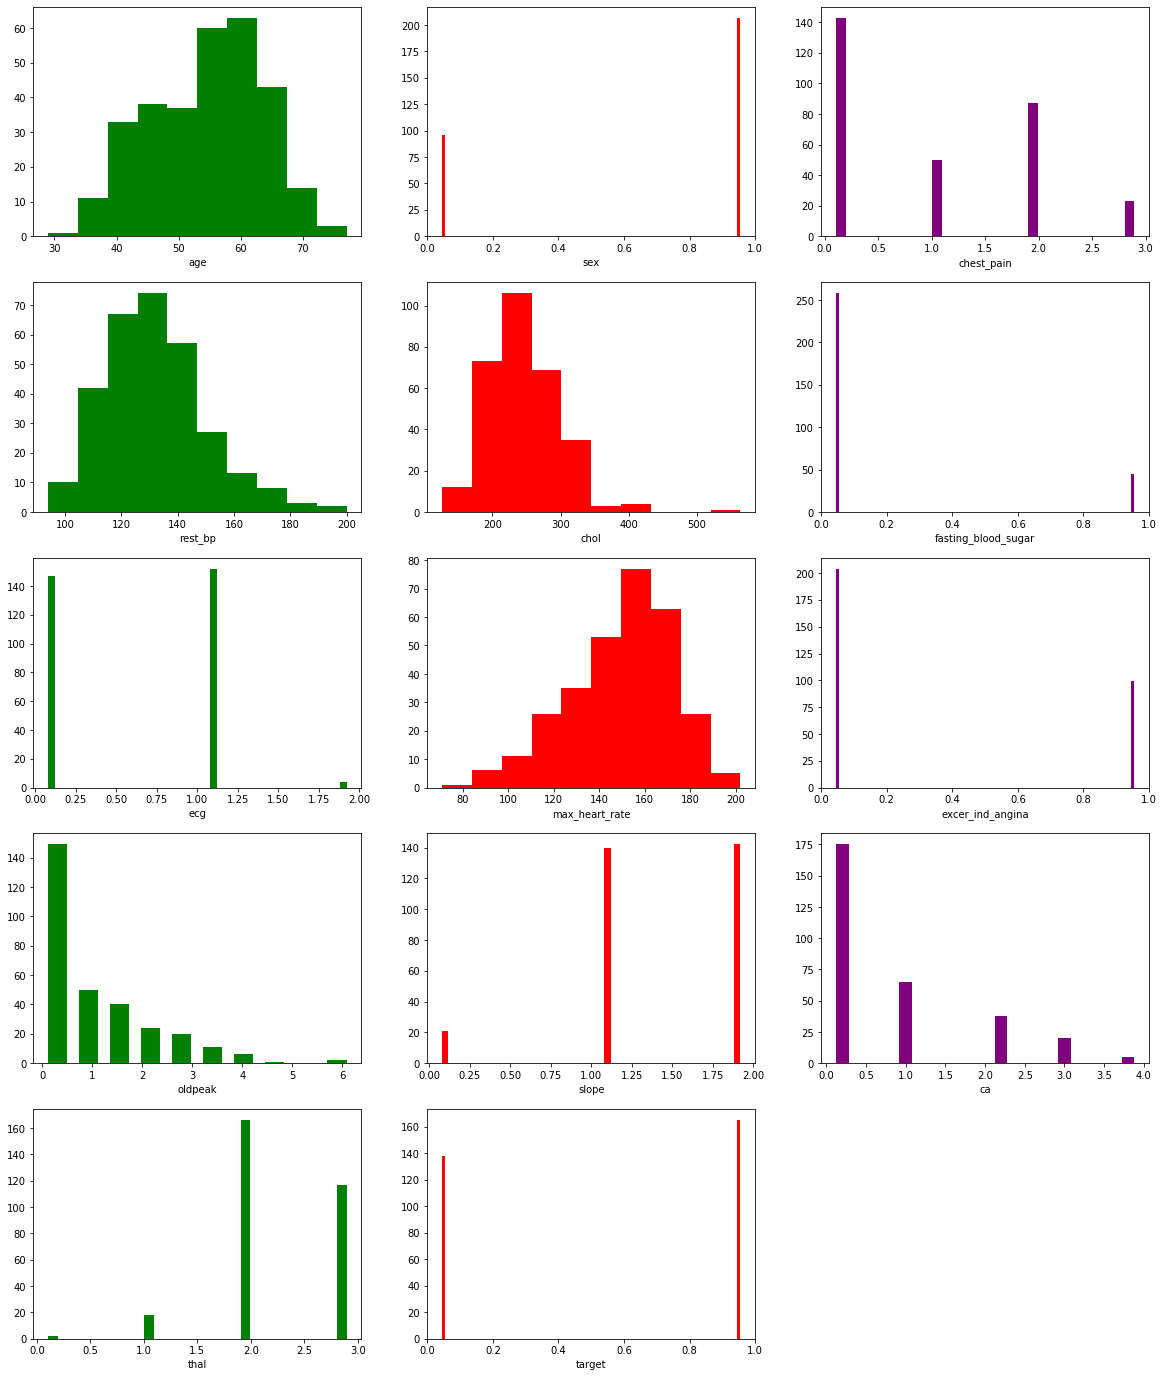

In [20]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
colors = ['green', 'Red', 'Purple']
i=0
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    plt.hist(df[continuous_feature],histtype='bar',rwidth=((df[continuous_feature].max()-df[continuous_feature].min())/10),color=colors[i])
    plt.xlabel(continuous_feature)
    i=(i+1)%3
    plotnumber+=1
plt.show()

### Finding Outliers

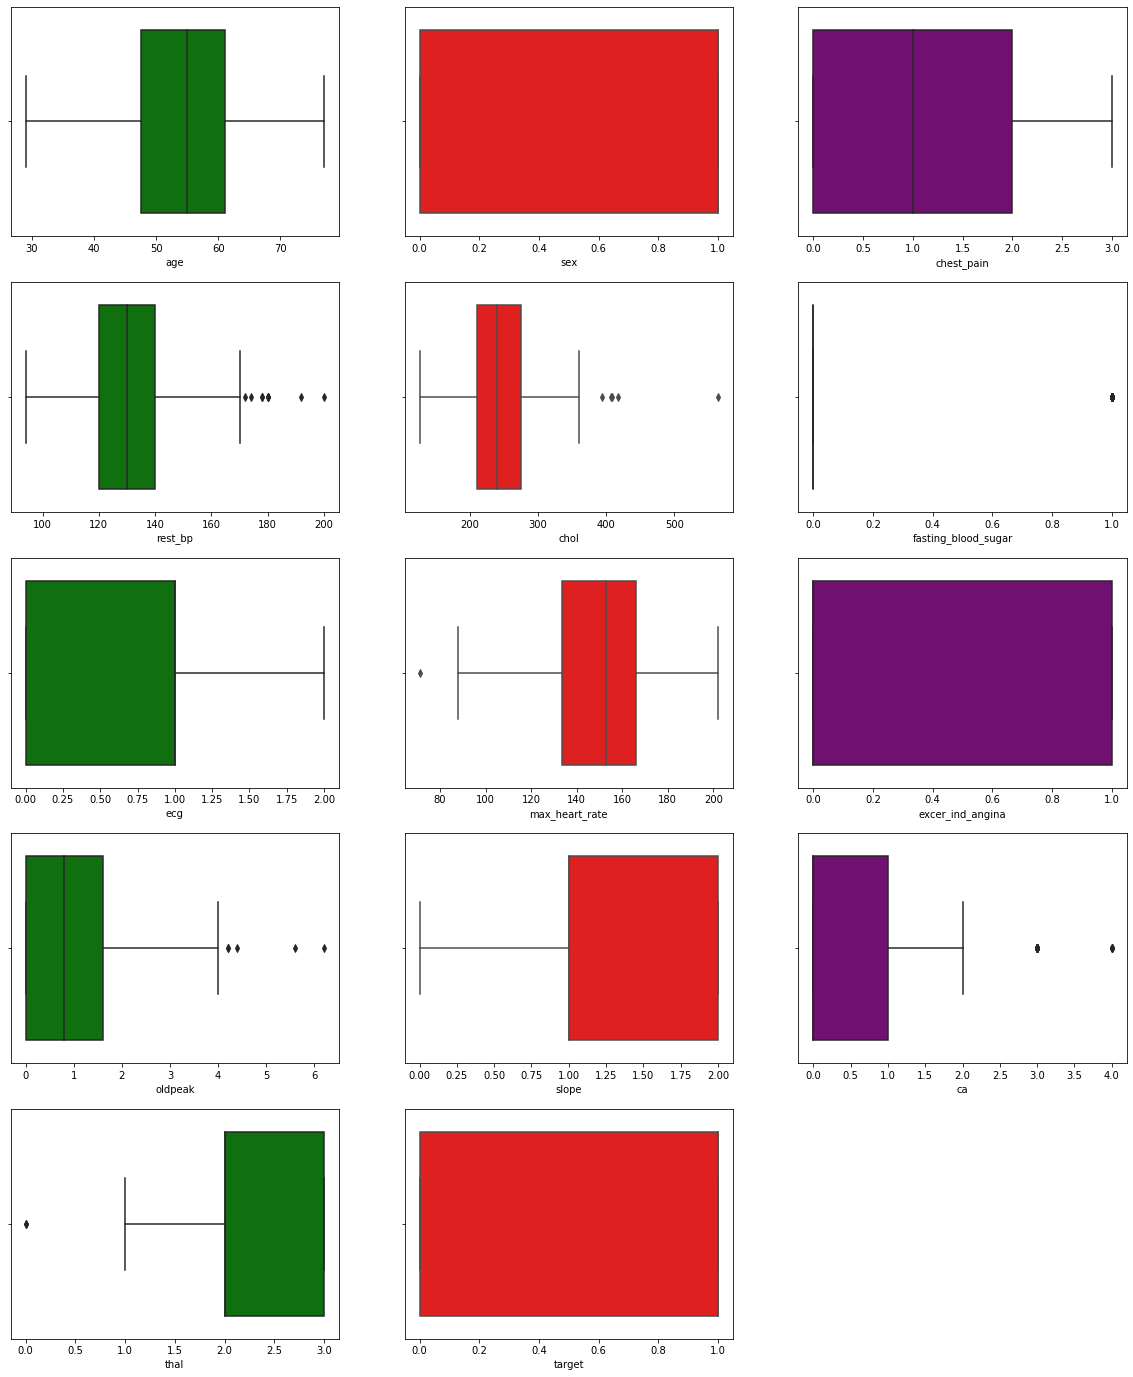

In [23]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
i=0
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[continuous_feature],color=colors[i])
    plt.xlabel(continuous_feature)
    i=(i+1)%3
    plotnumber+=1
plt.show()

Here is can be seen that there are several variables that have outliers present in them. These would only have to be removed if the Machine Learning Algorithm used is sensitive to outliers such as Regression, SVM or KNN.

However since the dataset itself is small these variables cannot be droppped

### Variable Relations

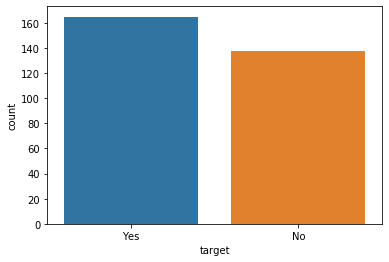

In [9]:
sns.countplot(x= 'target',data= d1)

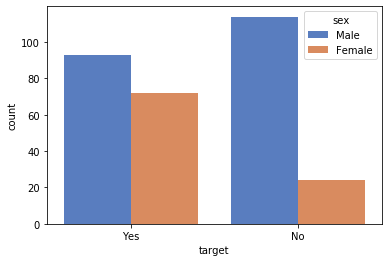

In [10]:
sns.countplot(x='target', data= d1,
              hue= 'sex', palette= 'muted')

Text(29.37017550998265, 0.5, 'Resting Blood Pressure')

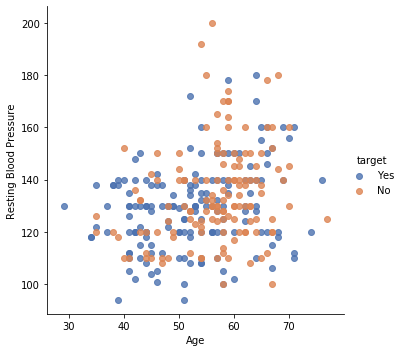

In [11]:
sns.lmplot(x='age', y='rest_bp', data= d1, fit_reg= False,
          hue= 'target',palette="deep")


plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')

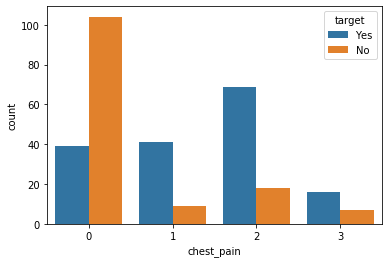

In [12]:
sns.countplot(x='chest_pain', data= d1, hue= 'target')

Text(35.44072265625002, 0.5, 'Maximum Heart Rate reached')

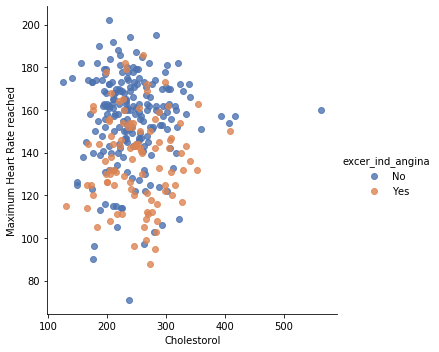

In [13]:
sns.lmplot(x='chol', y='max_heart_rate', data= d1, fit_reg= False,
          hue= 'excer_ind_angina',palette="deep")


plt.xlabel('Cholestorol')
plt.ylabel('Maximum Heart Rate reached')

Text(0.5, 0, 'Excerise Induced Angina')

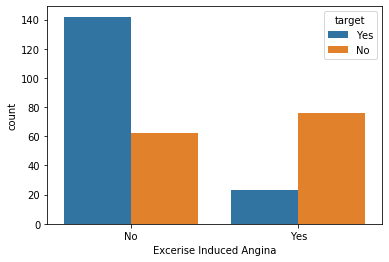

In [14]:
sns.countplot('excer_ind_angina', data= d1, hue= 'target')

plt.xlabel("Excerise Induced Angina")

Finding correlation

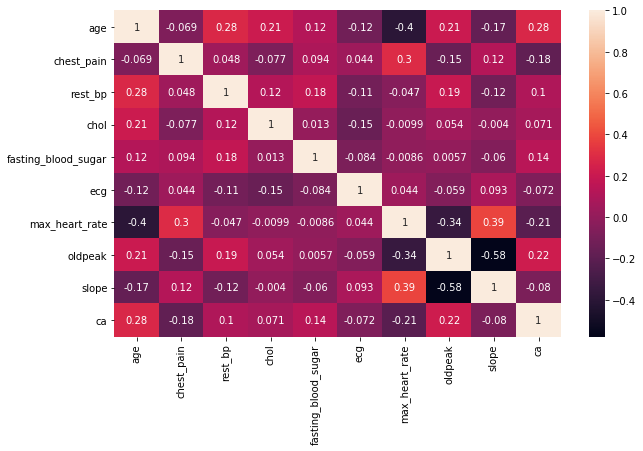

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(d2.corr(), annot=True)

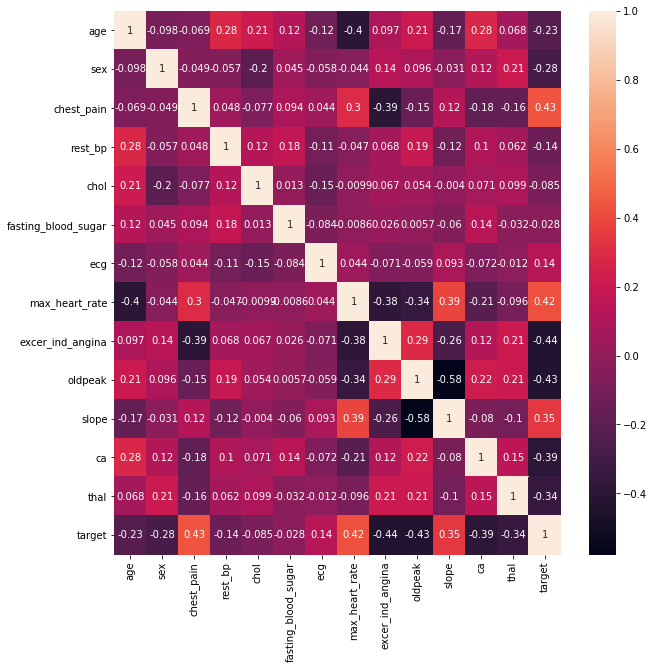

In [16]:
#finding correlation with numeric factor variables
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

## Conclusion

From the box plots it can be seen that there is a significant spread in the data of cholesterol level, with several outliers. Majority of the outliers are in the resting Blood Pressure and Cholesterol levels. 

When comparing genders, it can be seen that there is a higher risk of heart diseases associated with men, but since the dataset does not have equal number of male and female respondents, this association can not be verified from this dataset. 
When plotting age and Resting Blood Pressure, it can be seen that there is a very low, positive relation between them, however when seen it affects the occurrence of heart diseases, it can be seen that there is no significant pattern.  

Chest pain however, shows a greater relationship with the occurrence of heart diseases. At 0 level of pain there is a low risk of heart diseases happening but as the level of pain increases, so does the occurrence of heart diseases. The maximum number of cases recorded is at 2nd level of pain. 

When plotting the cholesterol level vs the maximum heart rate achieved it can be seen that the majority of the cases happen when the maximum heart rate is less than 140 beats per minute, irrespective of the level of cholesterol. This would indicate that lower heart rate during exercise can be indicative of heart diseases.

When the correlation is found between all the numeric variables, it is found that none of the variables have a significant correlation with each other. Even when the factor variables are kept as numeric it is seen that there is no strong correlation of the target variable with any of the independent variables. 

Lack of correlation of the independent variables makes this dataset ideal for use in regression modelling and if the accuracy of the model is high enough then it can be used to identify individuals with high risk of heart diseases before permanent harm falls upon them. 

